In [16]:
import os
os.chdir("PATH TO THE WORKING DIRECTORY")

In [17]:
Dataset="Dataset"
Data_Dir=os.listdir(Dataset)
print(Data_Dir)

['without_mask', 'with_mask']


In [18]:
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

img_rows, img_cols = 112, 112
images = []
labels= []

for category in Data_Dir:
  folder_path = os.path.join(Dataset, category)
  for img in os.listdir(folder_path):
    img_path = os.path.join(folder_path, img)
    img = cv2.imread(img_path)

    try:
      grayscale_img =  cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      resized_img=cv2.resize(grayscale_img, (img_rows, img_cols))
      images.append(resized_img)
      labels.append(category)
    except Exception as e:
      print('Exception ', e ,' has occured')

images=np.array(images)/255.0
images=np.reshape(images, (images.shape[0], img_rows, img_cols, 1))

lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
labels = np.array(labels)

(train_X, test_X, train_Y, test_Y) = train_test_split(images, labels, test_size=0.25,
                                                      random_state=0)


In [19]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D

num_classes = 2
batch_size = 32

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = (img_rows, img_cols, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 64)      640       
_________________________________________________________________
activation (Activation)      (None, 110, 110, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 128)       73856     
_________________________________________________________________
activation_1 (Activation)    (None, 53, 53, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0

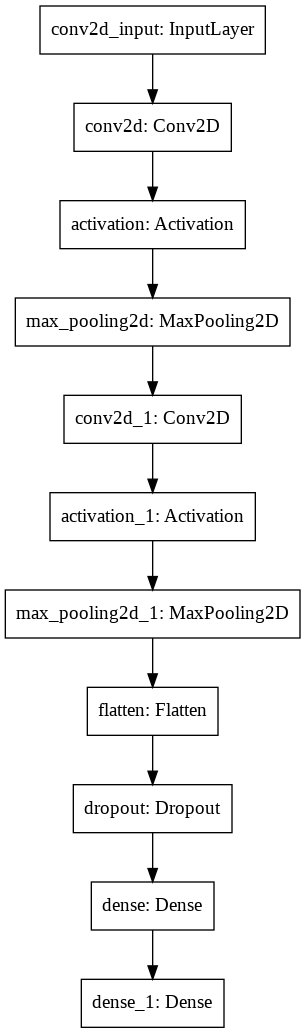

In [20]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='face_mask_detection_architecture.png')


In [22]:
from keras.optimizers import  Adam

epochs = 50
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate = 0.001),
              metrics = ['accuracy'])

fitted_model = model.fit(
    train_X,
    train_Y,
    epochs = epochs,
    validation_split = 0.25
)

Epoch 1/50
51/51 [==============================] - 3s 49ms/step - loss: 0.7367 - accuracy: 0.5762 - val_loss: 0.4638 - val_accuracy: 0.8063
Epoch 2/50
51/51 [==============================] - 2s 30ms/step - loss: 0.4457 - accuracy: 0.8042 - val_loss: 0.4143 - val_accuracy: 0.8432
Epoch 3/50
51/51 [==============================] - 1s 27ms/step - loss: 0.3697 - accuracy: 0.8553 - val_loss: 0.3514 - val_accuracy: 0.8598
Epoch 4/50
51/51 [==============================] - 1s 27ms/step - loss: 0.3045 - accuracy: 0.8890 - val_loss: 0.3087 - val_accuracy: 0.8653
Epoch 5/50
51/51 [==============================] - 1s 27ms/step - loss: 0.2345 - accuracy: 0.9058 - val_loss: 0.2843 - val_accuracy: 0.8856
Epoch 6/50
51/51 [==============================] - 1s 27ms/step - loss: 0.1735 - accuracy: 0.9370 - val_loss: 0.2220 - val_accuracy: 0.9151
Epoch 7/50
51/51 [==============================] - 1s 27ms/step - loss: 0.1258 - accuracy: 0.9551 - val_loss: 0.2166 - val_accuracy: 0.9114
Epoch 8/50
51

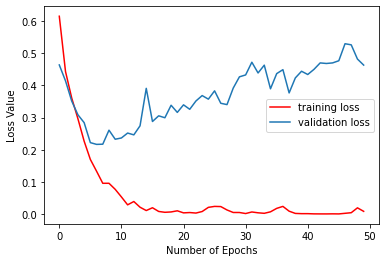

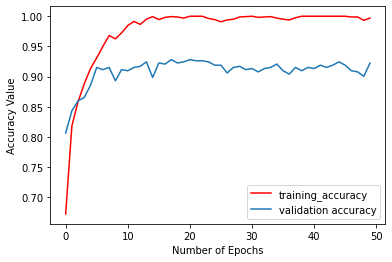

In [23]:
from matplotlib import pyplot as plt

plt.plot(fitted_model.history['loss'], 'r', label='training loss')
plt.plot(fitted_model.history['val_loss'], label='validation loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

plt.plot(fitted_model.history['accuracy'], 'r', label='training_accuracy')
plt.plot(fitted_model.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Value')
plt.legend()
plt.show()

In [25]:
model.save('face_mask_detection_alert_system.h5')